In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv("/kaggle/input/horvath-clock/simulated_horvath_clock_data.csv")

In [3]:
df.head(5)

,cg00000001,cg00000002,cg00000003,cg00000004,cg00000005,cg00000006,cg00000007,cg00000008,cg00000009,cg00000010,...,cg00000347,cg00000348,cg00000349,cg00000350,cg00000351,cg00000352,cg00000353,Chronological_Age,Biological_Age_Horvath,Age_Acceleration
0,0.462178,0.865500,0.712396,0.619061,0.309213,0.309196,0.240659,0.806323,0.620781,0.695651,...,0.644566,0.231713,0.462229,0.638102,0.552195,0.799543,0.661086,60.570276,59.370597,-1.199679
1,0.314054,0.249398,0.649693,0.218558,0.610043,0.858161,0.602832,0.471719,0.650302,0.520777,...,0.536798,0.572813,0.236276,0.435623,0.294090,0.244362,0.892972,71.893624,65.678603,-6.215021
2,0.425648,0.766912,0.378248,0.677052,0.732160,0.616947,0.530103,0.488289,0.444208,0.850670,...,0.857347,0.759148,0.898554,0.445498,0.737032,0.481352,0.535913,57.606859,65.432361,7.825501
3,0.639254,0.811574,0.888858,0.737791,0.492437,0.494950,0.716308,0.367144,0.277332,0.448236,...,0.532242,0.790919,0.763969,0.609748,0.807790,0.344089,0.278344,57.749146,59.150439,1.401293
4,0.388825,0.239961,0.571819,0.855624,0.227540,0.285477,0.516539,0.853713,0.421309,0.555064,...,0.276815,0.583572,0.518064,0.791050,0.268658,0.541769,0.305034,68.837826,63.400329,-5.437498


In [4]:
df.isnull().sum()

cg00000001                0
cg00000002                0
cg00000003                0
cg00000004                0
cg00000005                0
                         ..
cg00000352                0
cg00000353                0
Chronological_Age         0
Biological_Age_Horvath    0
Age_Acceleration          0
Length: 356, dtype: int64

In [6]:
df1=df[abs(df['Age_Acceleration'])<=20]

In [7]:
df1.shape

(18359, 356)

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
x=df1.drop(['Chronological_Age','Biological_Age_Horvath','Age_Acceleration'],axis=1)

In [11]:
y=df1['Biological_Age_Horvath']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.linear_model import ElasticNetCV

In [16]:
model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5, random_state=42)

In [18]:
model.fit(x_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             random_state=42)

In [19]:
y_pred = model.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
print("Elastic Net Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Best Alpha: {model.alpha_}")
print(f"Best L1 Ratio: {model.l1_ratio_}")

Elastic Net Results:
Mean Squared Error: 9.11
R² Score: 0.263
Best Alpha: 0.0026220690187621263
Best L1 Ratio: 0.1


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
%matplotlib inline

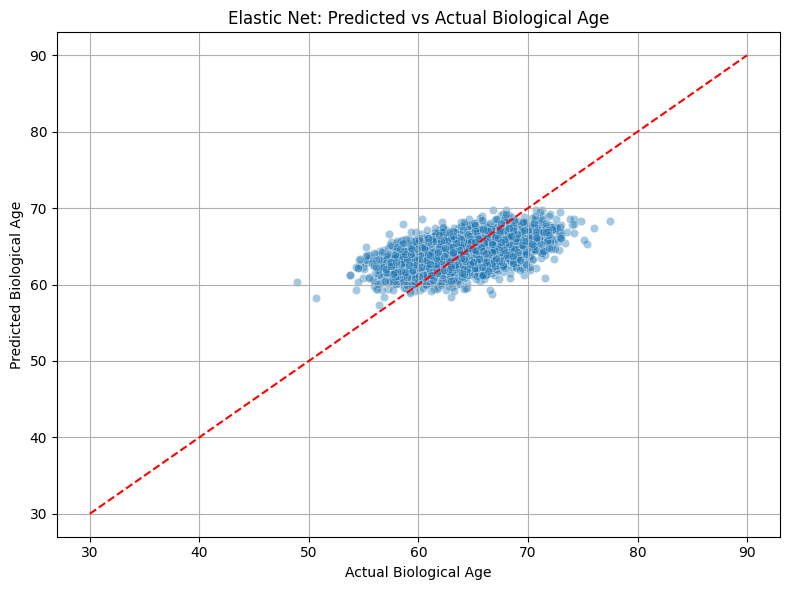

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([30, 90], [30, 90], 'r--')
plt.xlabel("Actual Biological Age")
plt.ylabel("Predicted Biological Age")
plt.title("Elastic Net: Predicted vs Actual Biological Age")
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


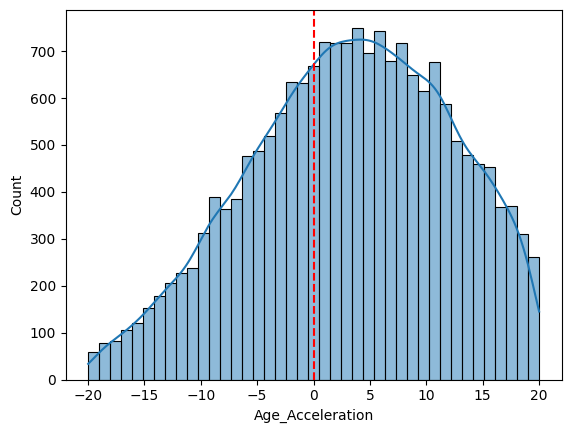

In [27]:
sns.histplot(df1['Age_Acceleration'], kde=True)
plt.axvline(0, color='red', linestyle='--')

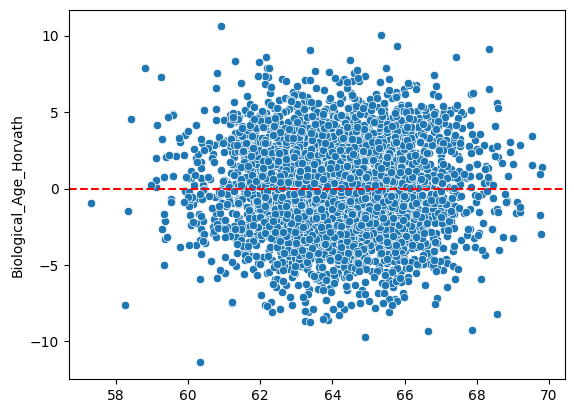

In [28]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')

<Axes: >

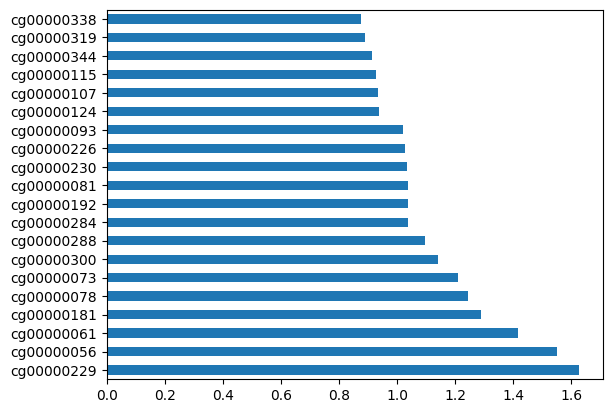

In [30]:
coefs = pd.Series(model.coef_, index=x.columns)
top_coefs = coefs.abs().sort_values(ascending=False).head(20)
top_coefs.plot(kind='barh')


In [31]:
import pickle

model_path = "/kaggle/working/model2_chsw.pkl"

with open(model_path, 'wb') as f:
    pickle.dump(model, f)

